# Project - Ratings Prediction

We have a client who has a website where people write different reviews for technical products. Now they are adding a new feature to their website i.e. The reviewer will have to add stars(rating) as well with the review.Now they want to predict ratings for the reviews which were written in the past and they don’t have a rating. So, we have to build an application which can predict the rating by seeing the review.

First we have to import the data which is available in the form of excel file .We have to import that file using pandas library.

In [1]:
#lets import pandas library to read the data
import pandas as pd
df = pd.read_excel('Combined.xlsx')
df

,Sr. No.,Site,Product,Model Name,Rating,Reviews
0,1,FlipKart,Laptop,HP 14s Core i5 11th Gen - (8 GB/512 GB SSD/Win...,4.3240,18
1,2,FlipKart,Laptop,MSI GF63 Thin Core i5 9th Gen - (8 GB/512 GB S...,4.4712,97
2,3,FlipKart,Laptop,HP Pavilion x360 Core i3 11th Gen - (8 GB/256 ...,4.4271,27
3,4,FlipKart,Laptop,Lenovo IdeaPad Flex 5 Ryzen 7 Octa Core 5700U ...,4.7300,0
4,5,FlipKart,Laptop,Lenovo Ideapad S145 Ryzen 3 Dual Core 3200U - ...,3.9500,749
...,...,...,...,...,...,...
12029,12030,ebay,Router,D-Link RangeBooster N DIR-628 54 Mbps 4-Port ...,4.5000,19
12030,12031,ebay,Router,NETGEAR AC1200 Smart Wi-Fi Router with Extern...,5.0000,45
12031,12032,ebay,Router,NETGEAR Nighthawk AC1900 Smart WiFi Router Mo...,4.5000,640
12032,12033,ebay,Router,Cisco Linksys E1200 V2 Wireless-N300 Wi-Fi Ro...,4.5000,253


Here in this dataset we have to predict ratings based on customer reviews on electronics product from online shopping sites. So to build a model using Machine Learning in order to predict the actual value of the ratings we have to do preprocessing on dataset and  decide the ratings based on reviews.

# Data Pre-processing 

There is some process that we have to do while pre-processing.

1.Our dataset is not always in proper format. Sometimes there maybe some missing values, sometimes there must be out of the box values. Our data is always a raw data so for that we have to do some wrangling process.

2.Check the data type of each column.

3.Check the summary of our dataset.

In [2]:
#Check the columns name
df.columns

Index(['Sr. No.', 'Site', 'Product', 'Model Name', 'Rating', 'Reviews'], dtype='object')

In [3]:
pd.options.display.max_info_columns = 5
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12034 entries, 0 to 12033
Columns: 6 entries, Sr. No. to Reviews
dtypes: float64(1), int64(2), object(3)
memory usage: 564.2+ KB


In [5]:
df.isnull().sum()

Sr. No.         0
Site            0
Product         0
Model Name      0
Rating        112
Reviews         0
dtype: int64

From this we can say that some columns have object data type, some have float and some have int data type. There are 112 null values present in our dataset so we have fill that values.

In [7]:
df.describe()

,Sr. No.,Rating,Reviews
count,12034.000000,11922.000000,12034.000000
mean,6017.500000,4.629389,328.451720
std,3474.060904,0.312361,1285.077686
min,1.000000,3.740000,0.000000
25%,3009.250000,4.500000,4.000000
50%,6017.500000,4.500000,20.000000
75%,9025.750000,5.000000,94.000000
max,12034.000000,5.000000,14203.000000


From above we can say that all values for each column is different.

1.For Ratings column max value is 5 and 75% value is 5. So we can say that in such case data is ok.

2.But for the Review column max value is 14203 and 75% value is 94 so in this case we can say that some outliers are present in this column.

# Fill NaN values

In [8]:
df.Rating = df.Rating.fillna(df.Rating.mean())

In [9]:
df.isnull().sum()

Sr. No.       0
Site          0
Product       0
Model Name    0
Rating        0
Reviews       0
dtype: int64

Here we have to fill null values using mean, median any method.

In [10]:
df.drop(columns=['Sr. No.','Model Name'],inplace=True)

We have drop the columns sr.no and model name.

# EDA

# Univariate

In this step we have to do the analysis of each column using univariate method. So for this I have used Count method to check the number of unique values present in that particular column and also some visualization libraries to understand our data more clearly.

In [11]:
df['Rating'].value_counts()

4.500000    4848
5.000000    4283
4.000000     543
4.310000     120
4.629389     112
            ... 
4.713200      20
4.471200      20
4.626600      20
4.727000      20
4.375000      20
Name: Rating, Length: 87, dtype: int64

We have to convert the ratings to round figure because the rating is out 5 stars and it only has 5 options available 1 star, 2 stars, 3 stars, 4 stars, 5 stars.

In [22]:
# converting 'rating' from float to int
df['Rating'] = df['Rating'].astype(int)

In [23]:
df['Rating'].value_counts()

4    7555
5    4283
3     196
Name: Rating, dtype: int64

In [13]:
df['Reviews'].value_counts()

1       1412
5        756
2        660
3        520
4        499
        ... 
665       20
1133      20
257       20
209       20
1075      20
Name: Reviews, Length: 136, dtype: int64

In [14]:
df['Site'].value_counts()

ebay        9674
FlipKart    2360
Name: Site, dtype: int64

In [16]:
df['Product'].value_counts()

Mobile       4654
Router       2020
computer     1560
Headphone    1440
Mobiles       960
TV            920
Laptop        480
Name: Product, dtype: int64

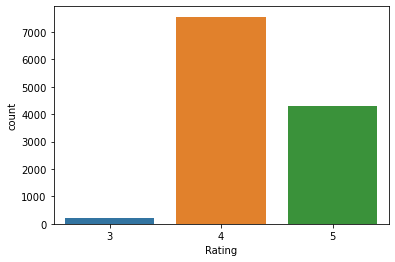

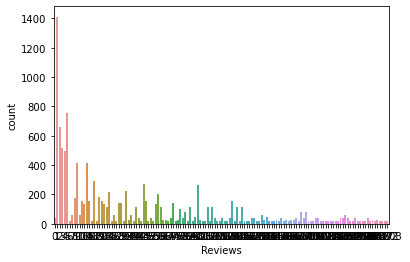

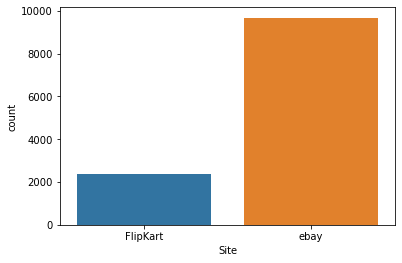

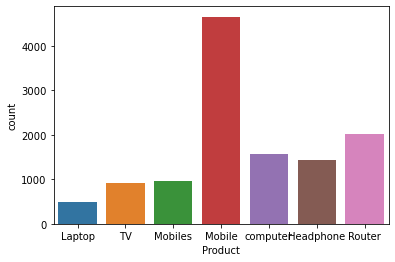

In [25]:
#lets see the label graphically to understand more clearly using some visualisation libraries
import seaborn as sns
import matplotlib.pyplot as plt
sns.countplot(x='Rating',data=df)
plt.show()
sns.countplot(x='Reviews',data=df)
plt.show()
sns.countplot(x='Site',data=df)
plt.show()
sns.countplot(x='Product',data=df)
plt.show()

# Bivariate

Seaborn and Matplotlib are two visualization libraries that used to visualize graphically data. In Bivariate method we have taken two variable one is target variable (rating) and other variable as all columns. In this way we have to visualize all variables with our target variable.

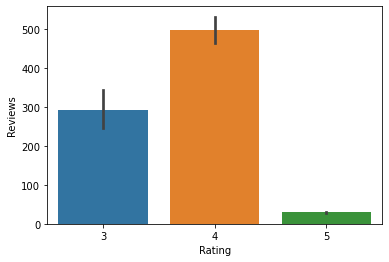

In [26]:
sns.barplot(x='Rating',y='Reviews',data=df)
plt.show()

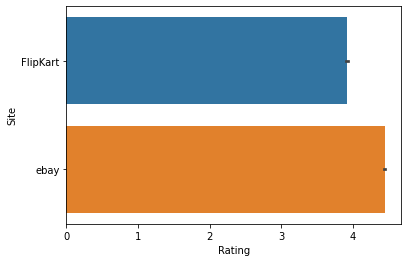

In [27]:
sns.barplot(x='Rating',y='Site',data=df)
plt.show()

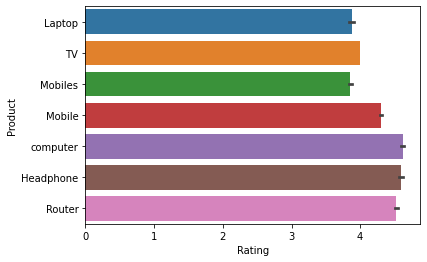

In [28]:
sns.barplot(x='Rating',y='Product',data=df)
plt.show()

We have to do the label encoding of our data. Because all columns are of different data type. So we have to convert non-numeric values to numeric using label encoding method

In [39]:
from sklearn.preprocessing import LabelEncoder
import numpy as np
le=LabelEncoder()
for columns in df.columns:
    if df[columns].dtype==np.number:
        continue
    df[columns]=le.fit_transform(df[columns])

# Correlation between columns

This above method is used to check the correlation between all columns. Heatmap method gives the graphical visualization from which we can easily understand the correlation.

In [34]:
df.corr()

,Site,Product,Rating,Reviews
Site,1.000000,-0.133894,0.411921,-0.549836
Product,-0.133894,1.000000,0.050788,0.004930
Rating,0.411921,0.050788,1.000000,-0.367349
Reviews,-0.549836,0.004930,-0.367349,1.000000


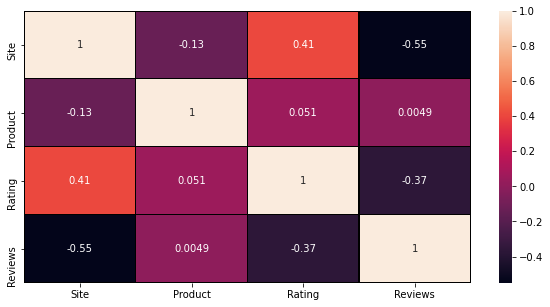

In [35]:
#lets check the correlation using heatmap for better understanding
plt.subplots(figsize=(10,5))
sns.heatmap(df.corr(),linewidths=.1,linecolor='black', annot=True)

Some columns are making good positive correlation with our target variable and some has negative correlation. So the variables that doesn’t make any good correlation with any variable so we to drop that column from the dataset.

# Checking outliers

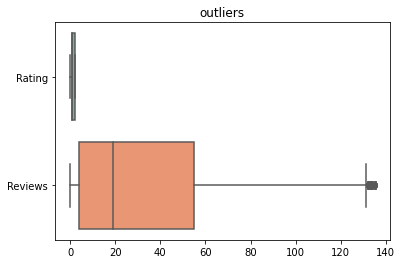

In [36]:
sns.boxplot(data=df[['Rating','Reviews']],orient='h',palette='Set2')
plt.title('outliers')
plt.show()

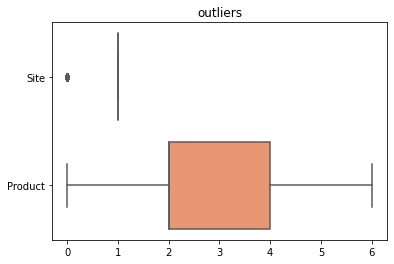

In [37]:
sns.boxplot(data=df[['Site','Product']],orient='h',palette='Set2')
plt.title('outliers')
plt.show()

Outliers are present in our dataset. So we have to remove that outliers to get the proper results.

In [38]:
#lets check the skewness of all columns
df.skew()

Site      -1.530911
Product    0.251573
Rating     0.297716
Reviews    1.123633
dtype: float64

# Removing outliers

In [40]:
import warnings
warnings.filterwarnings('ignore')
from scipy.stats import zscore
import numpy as np
z=np.abs(zscore(df))
thresholds=3
df_new=df[(z<3).all(axis=1)]

In [41]:
print([df.shape],[df_new.shape])

[(12034, 4)] [(12034, 4)]


There is no any loss in our dataset so we do not have to remove outliers.

In [42]:
#lets split the data into x and y variable(input & output)
x=df.drop(columns=["Rating"])
y=df[["Rating"]] #this is our target variable

In [43]:
#Scaling is used to bring the dataset in common range
from sklearn.preprocessing import StandardScaler
sc=StandardScaler()
scaledx=sc.fit_transform(x)

StandardScaler is that it will transform your data such that its distribution will have a mean value 0 and standard deviation of 1. In case of multivariate data, this is done feature-wise (in other words independently for each column of the data).

# Splitting the dataframe

Now we have to split our data in training and testing form. And we have apply some machine learning modules.

1.Our target variable is in categorical form so we have to apply logistic regression method.

2.We can also apply other methods to check which machine learning model gives better accuracy.

In [46]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(scaledx,y,test_size=.25,random_state=42)

In [49]:
#Import all model library
from sklearn.linear_model import LogisticRegression
lg=LogisticRegression()
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report
from sklearn.model_selection import GridSearchCV,cross_val_score
import warnings
warnings.filterwarnings('ignore')

In [50]:
for i in range(42,100):
    x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=.25,random_state=i)
    lg.fit(x_train,y_train)
    pred_train=lg.predict(x_train)
    pred_test=lg.predict(x_test)
    if round(accuracy_score(y_train,pred_train)*100,1)==round(accuracy_score(y_test,pred_test)*100,1):
        print('At random_state:',i)
        print('Training r2_score is:',accuracy_score(y_train,pred_train)*100)
        print('Testing r2_score is:',accuracy_score(y_test,pred_test)*100)

At random_state: 45
Training r2_score is: 72.05540166204986
Testing r2_score is: 72.05051512130277
At random_state: 47
Training r2_score is: 71.5567867036011
Testing r2_score is: 71.61847789963443
At random_state: 67
Training r2_score is: 71.8781163434903
Testing r2_score is: 71.91758059155866


In [51]:
pred_lg=lg.predict(x_test)
from sklearn.model_selection import cross_val_score
lss=accuracy_score(y_test,pred_lg)
for j in range(2,10):
    lsscore=cross_val_score(lg,x,y,cv=j)
    lsc=lsscore.mean()
    print('At cv:',j)
    print('Cross vali score is:',lss*100)
    print('Accuracy is:',lss*100)
    print('\n')

At cv: 2
Cross vali score is: 72.11698238617481
Accuracy is: 72.11698238617481


At cv: 3
Cross vali score is: 72.11698238617481
Accuracy is: 72.11698238617481


At cv: 4
Cross vali score is: 72.11698238617481
Accuracy is: 72.11698238617481


At cv: 5
Cross vali score is: 72.11698238617481
Accuracy is: 72.11698238617481


At cv: 6
Cross vali score is: 72.11698238617481
Accuracy is: 72.11698238617481


At cv: 7
Cross vali score is: 72.11698238617481
Accuracy is: 72.11698238617481


At cv: 8
Cross vali score is: 72.11698238617481
Accuracy is: 72.11698238617481


At cv: 9
Cross vali score is: 72.11698238617481
Accuracy is: 72.11698238617481




In [52]:
from sklearn.tree import DecisionTreeClassifier
dc=DecisionTreeClassifier()
dc.fit(x_train,y_train)
dc.score(x_train,y_train)
pred=dc.predict(x_test)
print(accuracy_score(y_test,pred)*100)    
print(confusion_matrix(y_test,pred))
print(classification_report(y_test,pred))

82.18677301429047
[[  43    0    0]
 [   0 1576  295]
 [   0  241  854]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        43
           1       0.87      0.84      0.85      1871
           2       0.74      0.78      0.76      1095

    accuracy                           0.82      3009
   macro avg       0.87      0.87      0.87      3009
weighted avg       0.82      0.82      0.82      3009



In [53]:
from sklearn.ensemble import RandomForestClassifier
rc=RandomForestClassifier()
rc.fit(x_train,y_train)
rc.score(x_train,y_train)
pred=rc.predict(x_test)
print(accuracy_score(y_test,pred)*100)
print(confusion_matrix(y_test,pred))
print(classification_report(y_test,pred))

82.25324027916251
[[  43    0    0]
 [   0 1572  299]
 [   0  235  860]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        43
           1       0.87      0.84      0.85      1871
           2       0.74      0.79      0.76      1095

    accuracy                           0.82      3009
   macro avg       0.87      0.88      0.87      3009
weighted avg       0.83      0.82      0.82      3009



In [55]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors = 5, metric = 'minkowski', p = 2)
knn.fit(x_train, y_train)
knn.score(x_test,y_test)*100

79.1957460950482

From above we can say that Random forest classifier gives 82.25% accuracy and other methods also gives more than 75% accuracy. So random forest classifier method works better for our model. 

# Model Saving

We have to save our model using pickle method or joblib method.

In [56]:
import pickle
filename='rating.pkl'
pickle.dump(rc,open(filename,'wb'))

# Conclusion

1.In the experimentation different machine learning algorithms were employed for the proposed model development and their performances were evaluated on various parameters.

2.From all above process we can say that whatever algorithms or method we used for prediction of our model all process with visualization is very beneficial. Using any visualization library it is easy for us to understand the all data.

3.For this data Randomforest classifier and decision tree classifier proves the best and others we have used also has good result.